In [77]:
import pandas as pd
df=pd.read_csv('C:\\Users\\nEW u\\Desktop\\DataSEts\\COVID_19 sentiment analysis.csv')
df.head()

,Unnamed: 0,sentiment,text
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [79]:
#checking if there any NAN value or not
df.isnull().sum()

Unnamed: 0    0
sentiment     0
text          0
dtype: int64

In [80]:
# droping the unnecesary colmns 
df.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [81]:
df.columns

Index(['sentiment', 'text'], dtype='object')

In [82]:
df['sentiment'].value_counts()

fear     801
sad      795
anger    767
joy      727
Name: sentiment, dtype: int64

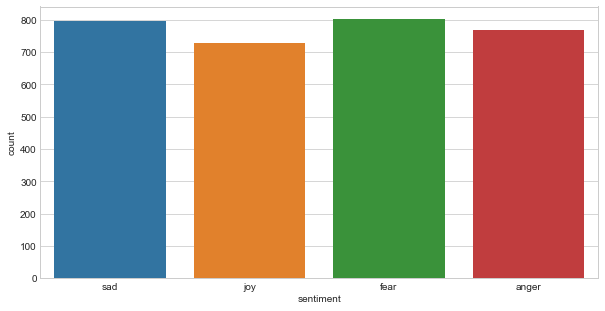

In [83]:

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.countplot(df['sentiment'])

In [84]:

from sklearn.preprocessing import LabelEncoder
scaler=LabelEncoder()
df['sentiment']=scaler.fit_transform(df['sentiment'])

In [86]:
#1 for fear
#3 for sad
#0 for anger
#2 for joy
df['sentiment'].value_counts()

1    801
3    795
0    767
2    727
Name: sentiment, dtype: int64

In [87]:
df.columns

Index(['sentiment', 'text'], dtype='object')

In [88]:
df['text'][:5]

0    agree the poor in india are treated badly thei...
1    if only i could have spent the with this cutie...
2    will nature conservation remain a priority in ...
3    coronavirus disappearing in italy show this to...
4    uk records lowest daily virus death toll since...
Name: text, dtype: object

In [89]:
df.shape

(3090, 2)

In [90]:
#making the copy of original datasets
message=df.copy()

In [91]:
message.head(3)

,sentiment,text
0,3,agree the poor in india are treated badly thei...
1,2,if only i could have spent the with this cutie...
2,2,will nature conservation remain a priority in ...


In [92]:
message.isnull().sum()

sentiment    0
text         0
dtype: int64

# Let's take a single paragraph for example message['text'][0] and check how the cleaning is going on after that it will be done in whole datasets.

In [94]:
message['text'][0]

'agree the poor in india are treated badly their poors seek a living in singapore and are treated like citizens they are given free medical treatment given food daily sim cards to call home to tell their family that they are fine if covid 19 case treated foc in hospitals'

In [95]:
para=''''agree the poor in india are treated badly their poors 
seek a living in singapore and are treated like citizens they 
are given free medical treatment given food daily sim cards
to call home to tell their family that they are fine if covid 
19 case treated foc in hospitals'''

# stemming and cleaning the text

In [96]:
import nltk
import re

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []

review=re.sub(r'http\S+',' ',para) #removing all the link releted text
review = re.sub('[^a-zA-Z]', ' ', review)# removing all the element except a-z and A-Z
review = review.lower()#lowering the text
review = review.split()

#removing all the stopwords and then stemming the text 
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
corpus.append(review)

In [97]:
corpus

['agre poor india treat badli poor seek live singapor treat like citizen given free medic treatment given food daili sim card call home tell famili fine covid case treat foc hospit']

# Its seems that 80% cleaning is done by stemming now let's check it my lemmatizing

In [98]:
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()

corpus_lem=[]
review=re.sub(r'http\S+',' ',para)#removing all the link releted text
review = re.sub('[^a-zA-Z]', ' ', review)# removing all the element except a-z and A-Z
review = review.lower()#lowering the text
review = review.split()

#removing all the stopwords and then lemmatizing the text 
review=[lem.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
review=' '.join(review)
corpus_lem.append(review)
    
corpus_lem

['agree poor india treated badly poor seek living singapore treated like citizen given free medical treatment given food daily sim card call home tell family fine covid case treated foc hospital']

# Now lets apply this in whole datasets for cleaning the text.

In [99]:
#stemming and cleaning
corpus_stem = []
for i in range(0, len(message)):
    review=re.sub(r'http\S+',' ',message['text'][i])
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus_stem.append(review)

In [100]:
len(message)

3090

In [101]:
df2=pd.DataFrame(df['sentiment'],index=None

In [102]:
df2['stemming_text']=corpus_stem

In [103]:
df2.head(4)

,sentiment,stemming_text
0,3,agre poor india treat badli poor seek live sin...
1,2,could spent cuti vc sakshi n g h coast cross r...
2,2,natur conserv remain prioriti post corona bang...
3,3,coronaviru disappear itali show intellectu say...


# Most commonly used Anger words 

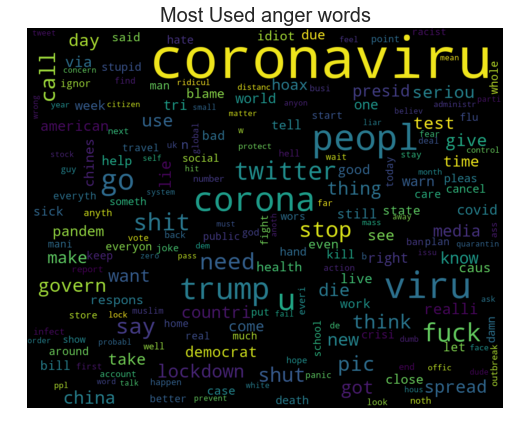

In [108]:

from wordcloud import WordCloud
anger_text = df2[df2['sentiment'] == 0]
all_words = ' '.join([text for text in anger_text.stemming_text])
wordcloud = WordCloud(width= 1000, height= 800,
                          max_font_size = 120,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most Used anger words", fontsize=20)
plt.axis("off")
plt.show()

# Most commonly used Fear words

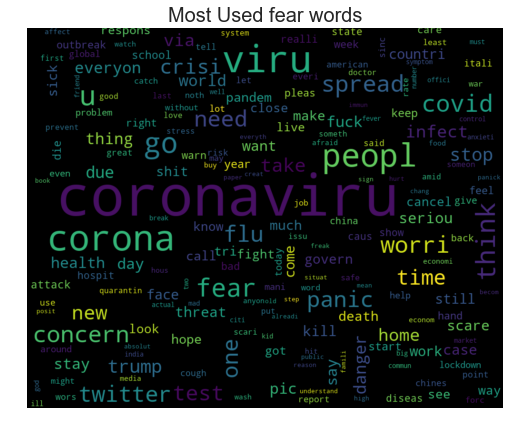

In [109]:

from wordcloud import WordCloud
fear_text = df2[df2['sentiment'] == 1]
all_words = ' '.join([text for text in fear_text.stemming_text])
wordcloud = WordCloud(width= 1000, height= 800,
                          max_font_size = 120,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most Used fear words", fontsize=20)
plt.axis("off")
plt.show()

# Most commonly used Joy words

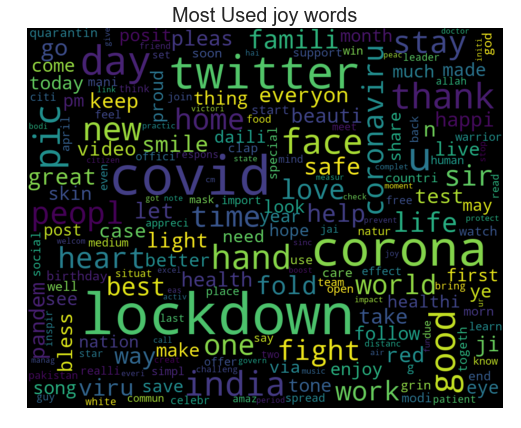

In [110]:
from wordcloud import WordCloud
joy_text = df2[df2['sentiment'] == 2]
all_words = ' '.join([text for text in joy_text.stemming_text])
wordcloud = WordCloud(width= 1000, height= 800,
                          max_font_size = 120,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most Used joy words", fontsize=20)
plt.axis("off")
plt.show()

# Most commonly used Sad words

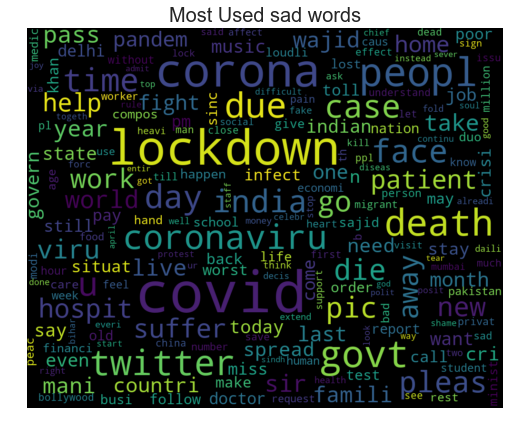

In [111]:
from wordcloud import WordCloud
sad_text = df2[df2['sentiment'] == 3]
all_words = ' '.join([text for text in sad_text.stemming_text])
wordcloud = WordCloud(width= 1000, height= 800,
                          max_font_size = 120,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most Used sad words", fontsize=20)
plt.axis("off")
plt.show()

In [112]:
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()
def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(15,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'yellow')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()
    
    


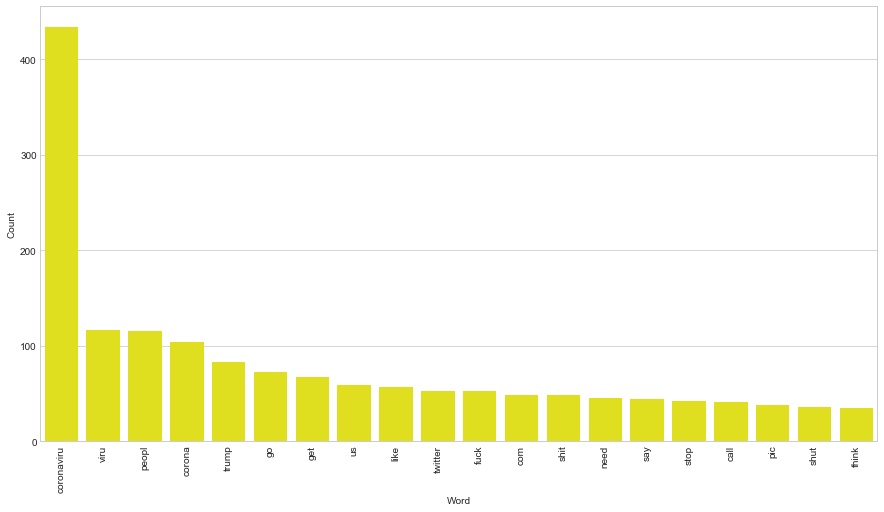

In [113]:
#frequency of most anger words
counter(df2[df2['sentiment'] == 0], 'stemming_text', 20)

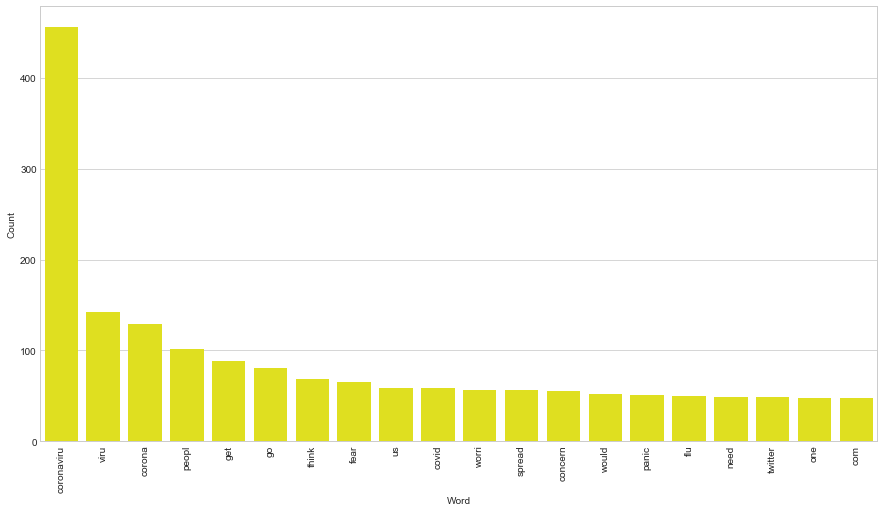

In [115]:
#frequency of most fear words
counter(df2[df2['sentiment'] == 1], 'stemming_text', 20)

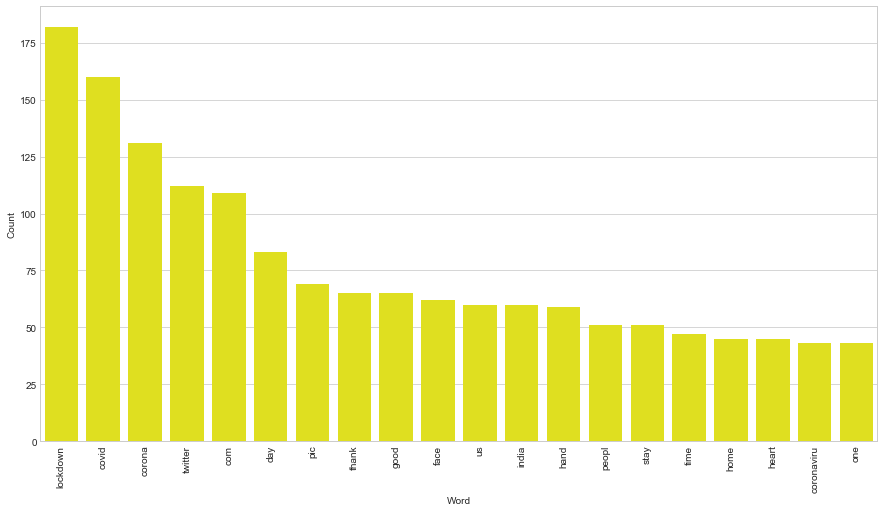

In [116]:
#frequency of most joy words
counter(df2[df2['sentiment'] == 2], 'stemming_text', 20)

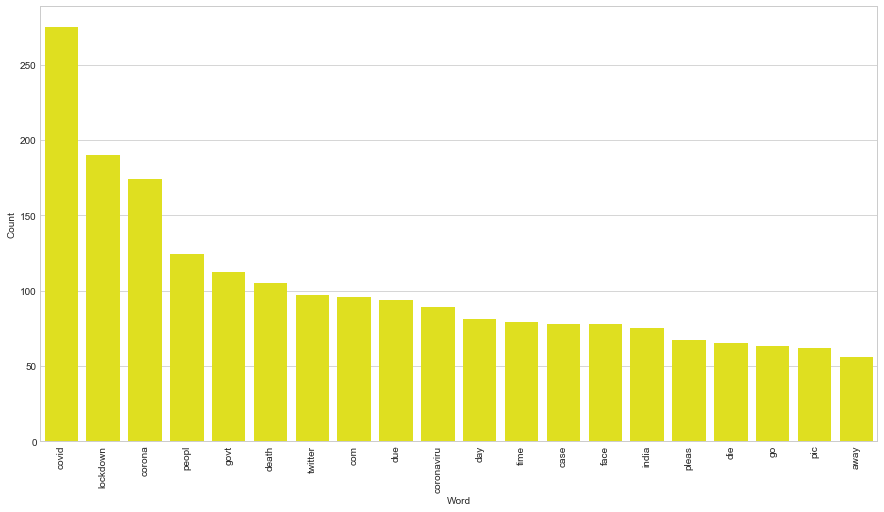

In [117]:
#frequency of most sad words
counter(df2[df2['sentiment'] == 3], 'stemming_text', 20)

In [118]:
#lammetizing and cleaning

corpus_lemmetize = []
for i in range(0, len(message)):
    review=re.sub(r'http\S+',' ',message['text'][i])
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    
    review = [lem.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus_lemmetize.append(review)

In [119]:
corpus_lemmetize[:2]

['agree poor india treated badly poor seek living singapore treated like citizen given free medical treatment given food daily sim card call home tell family fine covid case treated foc hospital',
 'could spent cutie vc sakshi n g h coast crossing republik']

In [120]:
len(corpus_lemmetize)

3090

In [121]:
#countvectoriser with stemming

from sklearn.feature_extraction.text import CountVectorizer
CV=CountVectorizer(max_features=5000, ngram_range=(1,3))
x_stem=CV.fit_transform(corpus_stem).toarray()
x_stem

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [122]:
print(x_stem.shape)

(3090, 5000)


In [123]:
#countvectorizer with lemmetizing

from sklearn.feature_extraction.text import CountVectorizer
CV=CountVectorizer(max_features=5000)
x_lem=CV.fit_transform(corpus_lemmetize).toarray()
x_lem

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [124]:
print(x_lem.shape)

(3090, 5000)


In [125]:
#TF-IDF for stemming

from sklearn.feature_extraction.text import TfidfVectorizer
tf_stem=TfidfVectorizer()
x_tf_stem=tf_stem.fit_transform(corpus_stem)
print(x_tf_stem.shape)


(3090, 7534)


In [126]:
#TF-IDF for lemmatizing

from sklearn.feature_extraction.text import TfidfVectorizer
tf_stem=TfidfVectorizer()
x_tf_lem=tf_stem.fit_transform(corpus_lemmetize)
print(x_tf_lem.shape)

(3090, 9054)


In [127]:
y=df['sentiment']
y[:5]

0    3
1    2
2    2
3    3
4    3
Name: sentiment, dtype: int32

#  Making the model by using Countvectorizer and Stemming

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x_stem,y,test_size=0.2)

In [129]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2472, 5000), (618, 5000), (2472,), (618,))

In [130]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB().fit(X_train,y_train)

In [131]:
model.score(X_test,y_test)

0.6634304207119741

In [132]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 91,  62,   3,  10],
       [ 47, 106,   8,   1],
       [  5,   9, 115,  16],
       [ 13,  23,  11,  98]], dtype=int64)

In [133]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.55      0.57       166
           1       0.53      0.65      0.59       162
           2       0.84      0.79      0.82       145
           3       0.78      0.68      0.73       145

   micro avg       0.66      0.66      0.66       618
   macro avg       0.68      0.67      0.67       618
weighted avg       0.68      0.66      0.67       618



Text(73.5,0.5,'True')

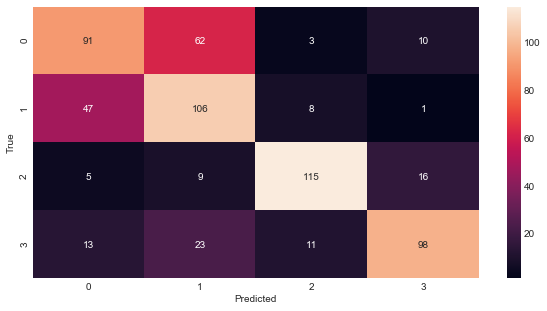

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

# Making the model by using Lemmetizing and Countvectorizer

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x_lem,y,test_size=0.2)

In [136]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2472, 5000), (618, 5000), (2472,), (618,))

In [137]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB().fit(X_train,y_train)

In [138]:
model.score(X_test,y_test)

0.6666666666666666

In [139]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 78,  58,   2,  13],
       [ 40, 105,   8,  13],
       [  5,   6,  99,  29],
       [ 12,   9,  11, 130]], dtype=int64)

In [140]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.52      0.55       151
           1       0.59      0.63      0.61       166
           2       0.82      0.71      0.76       139
           3       0.70      0.80      0.75       162

   micro avg       0.67      0.67      0.67       618
   macro avg       0.67      0.67      0.67       618
weighted avg       0.67      0.67      0.67       618



Text(73.5,0.5,'True')

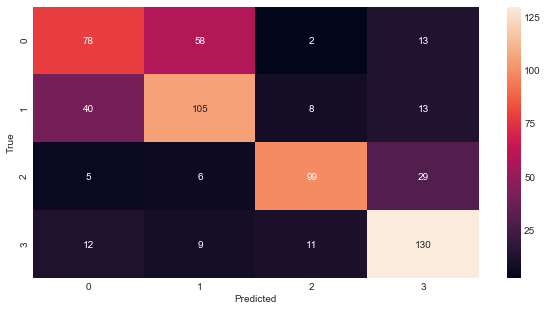

In [141]:
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

# Making the model by using TF-IDF and stemming

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x_tf_stem,y,test_size=0.2)

In [143]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2472, 7534), (618, 7534), (2472,), (618,))

In [144]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB().fit(X_train,y_train)

In [145]:
model.score(X_test,y_test)

0.6812297734627831

In [146]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 78,  48,   4,  24],
       [ 35, 115,   4,  16],
       [  3,   9,  98,  35],
       [  8,   4,   7, 130]], dtype=int64)

In [147]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.51      0.56       154
           1       0.65      0.68      0.66       170
           2       0.87      0.68      0.76       145
           3       0.63      0.87      0.73       149

   micro avg       0.68      0.68      0.68       618
   macro avg       0.70      0.68      0.68       618
weighted avg       0.69      0.68      0.68       618



Text(73.5,0.5,'True')

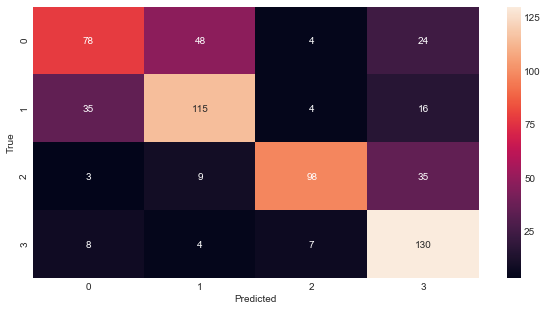

In [148]:
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

# Making the model by using TF-IDF and lemmetizing

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x_tf_lem,y,test_size=0.2)

In [150]:
x_tf_lem.shape

(3090, 9054)

In [151]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB().fit(X_train,y_train)

In [152]:
model.score(X_test,y_test)

0.6812297734627831

In [153]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 77,  62,   3,  20],
       [ 28, 126,   5,  18],
       [  4,  13,  91,  27],
       [  1,   9,   7, 127]], dtype=int64)

In [154]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.48      0.57       162
           1       0.60      0.71      0.65       177
           2       0.86      0.67      0.76       135
           3       0.66      0.88      0.76       144

   micro avg       0.68      0.68      0.68       618
   macro avg       0.70      0.69      0.68       618
weighted avg       0.70      0.68      0.68       618



Text(73.5,0.5,'True')

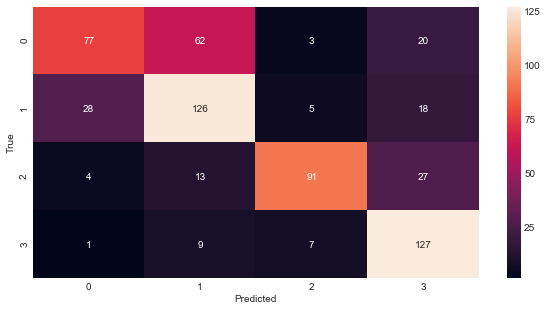

In [155]:
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')


# Let's check the accuracy after applying hyperparameter in MultinomialNB

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x_stem,y,test_size=0.2)

classifier=MultinomialNB(alpha=0.1)

from sklearn import metrics
import numpy as np
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\Public\anacondainstallation\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.6116504854368932
Alpha: 0.1, Score : 0.6521035598705501
Alpha: 0.2, Score : 0.656957928802589
Alpha: 0.30000000000000004, Score : 0.6650485436893204
Alpha: 0.4, Score : 0.6666666666666666
Alpha: 0.5, Score : 0.6699029126213593
Alpha: 0.6000000000000001, Score : 0.6747572815533981
Alpha: 0.7000000000000001, Score : 0.6731391585760518
Alpha: 0.8, Score : 0.6666666666666666
Alpha: 0.9, Score : 0.6682847896440129


# when alpha=0.6 its gives the maximumn accuracy of 0.6747572815533981

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix

# Now let's check with other classifier algorithm like DecisionTreeClassifier, RandamForestClassifier, SVM, LogisticRegression by using GridSearchCV and crossvalidation

In [158]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20,25,30,40],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,15,20,25,30]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear'),
        'params': {
            'C': [1,5,10,15,20,25]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy']
        }
    }
}

In [159]:
scores = []

X_train, X_test, y_train, y_test= train_test_split(x_stem,y,test_size=0.2)

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score

C:\Users\Public\anacondainstallation\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Public\anacondainstallation\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Public\anacondainstallation\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Public\anacondainstallation\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Fut

,model,best_score,best_params
0,svm,0.653317,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.625405,{'n_estimators': 30}
2,logistic_regression,0.690534,{'C': 1}
3,decision_tree,0.539239,{'criterion': 'gini'}


# Hence, It can conclude that Logistic Regression with the accuracy of 0.690534